# Sentiment Analysis
用 nltk 的 SentimentIntensityAnalyzer 找出評論的情緒正負面傾向，將得到的情緒指標(`Sentiment`)與評論的使用者評分(`rating`)做比較，得到較理想的正負評(`polarity`)劃分範圍。

In [4]:
# Read data

import pandas as pd
import numpy as np

train_data_path = './drugsComments/train.tsv'
test_data_path = './drugsComments/test.tsv'

train_df = pd.read_csv(train_data_path, sep='\t')
test_df = pd.read_csv(test_data_path, sep='\t')

print(train_df.shape)
print('\n')
print(train_df.head())

(161297, 7)


   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 20

In [5]:
# Drop unnecessary columns: Unnamed & date

train_df.drop(columns=['Unnamed: 0', 'date'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'date'], inplace=True)

print(train_df.shape)
print(train_df.head())
print('\n')

# Check if there is any null value

print(train_df.info())

(161297, 5)
                   drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  usefulCount  
0  "It has no side effect, I take it in combinati...     9.0           27  
1  "My son is halfway through his fourth week of ...     8.0          192  
2  "I used to take another oral contraceptive, wh...     5.0           17  
3  "This is my first time using any form of birth...     8.0           10  
4  "Suboxone has completely turned my life around...     9.0           37  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 5 columns):
drugName       161297 non-null object
condition      

以下一樣根據`drugName`, `condition`兩個欄位建立藥名及症狀停用字set，用來過濾使用心得，以便下面做情緒分析。

In [6]:
# Keep a set which includes all the names of drugs and conditions occurred in the dataset.

import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

drugNameSet_train = set(train_df['drugName'])
conditionNameSet_train = set(train_df['condition'])
drugNameSet_test = set(test_df['drugName'])
conditionNameSet_test = set(test_df['condition'])

oldDrugSet = drugNameSet_train | conditionNameSet_train | drugNameSet_test | conditionNameSet_test

drugSet = set()

print('drug names which are filtered out:\n')
for drug in oldDrugSet:
    drugStr = str(drug).lower()
    if not("helpful." in drugStr):
        drugStr = REPLACE_NO_SPACE.sub("", drugStr)
        drugStr = re.sub("\d+", "", drugStr)
        drugList = drugStr.split(' / ')
        for item in drugList:
            drugSet.add(item)
    else:
        print(drugStr)

drugSet.remove('nan')

# Print `drugSet`

print('\nsize of drugSet:')
print(len(drugSet))

print('\nFirst 20 drugs in drugSet:')
showNum = 20
countNum = 0
for drug in drugSet:
    print(drug)
    countNum += 1
    if(countNum == showNum):
        break

drug names which are filtered out:

43</span> users found this comment helpful.
142</span> users found this comment helpful.
25</span> users found this comment helpful.
6</span> users found this comment helpful.
46</span> users found this comment helpful.
98</span> users found this comment helpful.
30</span> users found this comment helpful.
95</span> users found this comment helpful.
4</span> users found this comment helpful.
123</span> users found this comment helpful.
2</span> users found this comment helpful.
45</span> users found this comment helpful.
27</span> users found this comment helpful.
0</span> users found this comment helpful.
17</span> users found this comment helpful.
22</span> users found this comment helpful.
12</span> users found this comment helpful.
14</span> users found this comment helpful.
72</span> users found this comment helpful.
28</span> users found this comment helpful.
47</span> users found this comment helpful.
54</span> users found this comment helpful

In [7]:
# Plot the counts of each ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=train_df)
plt.show()
print(train_df.groupby(['rating']).size())

<Figure size 640x480 with 1 Axes>

rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64


    rating polarity
0      9.0        1
1      8.0        1
2      5.0        0
3      8.0        1
4      9.0        1
5      2.0       -1
6      1.0       -1
7     10.0        1
8      1.0       -1
9      8.0        1
10     9.0        1
11    10.0        1
12     4.0       -1
13     4.0       -1
14     3.0       -1
15     9.0        1
16     9.0        1
17     9.0        1
18    10.0        1
19    10.0        1
20     8.0        1
21    10.0        1
22     9.0        1
23    10.0        1
24     1.0       -1
25     7.0        0
26    10.0        1
27    10.0        1
28     6.0        0
29     8.0        1

training data:


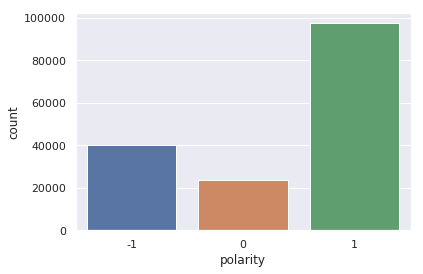

testing data:


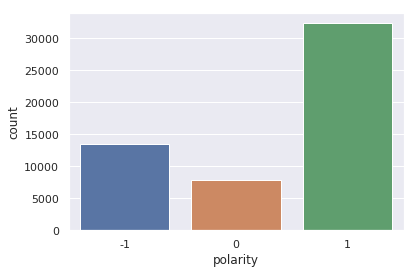

In [8]:
# Define `polarity`

train_df['polarity'] = pd.cut(train_df['rating'], bins=[-1, 4, 7, 10], labels=[-1, 0, 1])
test_df['polarity'] = pd.cut(test_df['rating'], bins=[-1, 4, 7, 10], labels=[-1, 0, 1])

print(train_df[['rating', 'polarity']].head(30))


# Plot the counts of each `polarity`

print('\ntraining data:')
plt.figure()
sns.set()
ax = sns.countplot(x="polarity", data=train_df)
plt.show()

print('testing data:')
plt.figure()
sns.set()
ax = sns.countplot(x="polarity", data=test_df)
plt.show()

In [9]:
# Text cleaning

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm

tqdm.pandas()

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

stopWords = set(stopwords.words('english'))

def filter_stopwords(sentence):
    sentence = sentence.replace("&#039;", "'")
    sentence = REPLACE_NO_SPACE.sub("", sentence)
    sentence = REPLACE_WITH_SPACE.sub(" ", sentence)
    
    words = word_tokenize(sentence)
    wordsFiltered = []
    for w in words:
        if (w not in drugSet):
            wordsFiltered.append(w)
    joinStr = " "
    return joinStr.join(wordsFiltered)


print('before cleaning:\n')
print(train_df['review'].head().values)

train_df['review'] = train_df['review'].progress_apply(filter_stopwords)
test_df['review'] = test_df['review'].progress_apply(filter_stopwords)

print('\nafter cleaning:\n')
print(train_df['review'].head().values)

  0%|          | 99/161297 [00:00<02:43, 984.27it/s]

before cleaning:

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'
 '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it

100%|██████████| 53766/53766 [00:42<00:00, 1270.61it/s]


after cleaning:

['It has no side effect I take it in combination of Bystolic 5 Mg and Fish Oil'
 'My son is halfway through his fourth week of Intuniv We became concerned when he began this last week when he started taking the highest dose he will be on For two days he could hardly get out of bed was very cranky and slept for nearly 8 hours on drive home from school vacation very unusual for him I called his doctor on Monday morning and she said to stick it out few days See how he did at school and with getting up in the morning The last two days have been problem free He is MUCH more agreeable than ever He is less emotional good thing less cranky He is remembering all the things he should Overall his behavior is better We have tried many different medications and so far this is the most effective'
 'I used to take another oral contraceptive which had 21 pill cycle and was very happy very light periods max 5 days no other side effects But it contained hormone gestodene which is not a

In [ ]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
train_df['Sentiment Score']=train_df["review"].apply(lambda x:SIA.polarity_scores(x)['compound'])
train_df['Neutral Score']=train_df["review"].apply(lambda x:SIA.polarity_scores(x)['neu'])
train_df['Negative Score']=train_df["review"].apply(lambda x:SIA.polarity_scores(x)['neg'])
train_df['Positive Score']=train_df["review"].apply(lambda x:SIA.polarity_scores(x)['pos'])

In [12]:
# Converting 0 to 1 Decimal Score to a Categorical Variable
train_df['Sentiment']=''
train_df.loc[train_df['Sentiment Score']>0,'Sentiment']='Positive'
train_df.loc[train_df['Sentiment Score']==0,'Sentiment']='Neutral'
train_df.loc[train_df['Sentiment Score']<0,'Sentiment']='Negative'

print(train_df.head(15))

                              drugName                     condition  \
0                            Valsartan  Left Ventricular Dysfunction   
1                           Guanfacine                          ADHD   
2                               Lybrel                 Birth Control   
3                           Ortho Evra                 Birth Control   
4             Buprenorphine / naloxone             Opiate Dependence   
5                               Cialis  Benign Prostatic Hyperplasia   
6                       Levonorgestrel       Emergency Contraception   
7                         Aripiprazole               Bipolar Disorde   
8                               Keppra                      Epilepsy   
9   Ethinyl estradiol / levonorgestrel                 Birth Control   
10                          Topiramate           Migraine Prevention   
11                      L-methylfolate                    Depression   
12                             Pentasa               Crohn's Dis

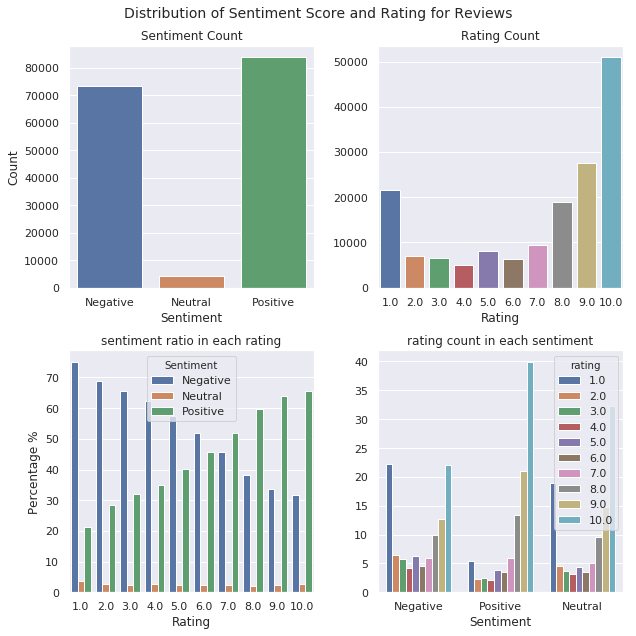

In [14]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=train_df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Sentiment Count")

sns.countplot(x="rating", data=train_df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Rating Count")

percentstandardize_barplot(x="rating",y="Percentage",hue="Sentiment",data=train_df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("sentiment ratio in each rating")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="rating",data=train_df, ax=axes[1,1])
axes[1,1].set_ylabel("count")
axes[1,1].set_title("rating count in each sentiment")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

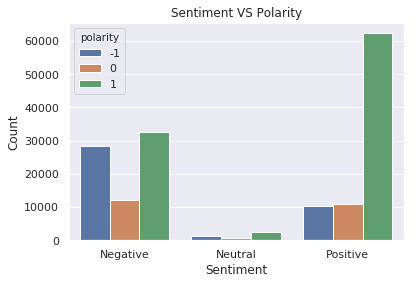

In [20]:
sns.countplot(x='Sentiment', hue='polarity',data=train_df, order=["Negative","Neutral","Positive"])
plt.title("Sentiment VS Polarity")
plt.ylabel("Count")
plt.show()

在 baseline.ipynb 中的 `polarity` 是定義 1-4 分為負評(標記：-1), 5-7 分為中性評論(標記：0), 8-10 分為好評(標記：1)。但從上面的四格圖中的左下那張圖可以看到 `rating` 為 5 時，negative sentiment 跟 positive sentiment 的比例還是有一點差距，不像 `rating` 為 6 及 7 時兩個的比例那麼接近。四格圖的右下那張圖也可以看到，原本設定的中性評論 `rating` 範圍 6 及 7 在 negative, positive, neutral sentiment 中的數量都差不多，而 `rating` >= 8 時就可以看出明顯在 positive sentiment 中的數量比在 negative, neutral sentiment 中的數量多出很多，`rating` <= 5 則是明顯在 negative sentiment 中的數量比在 positive, neutral sentiment 中的數量多很多。因此在 hw4.ipynb 中可以考慮把 `polarity` 劃分範圍改為：1-5 分為負評(標記：-1), 6-7 分為中性評論(標記：0), 8-10 分為好評(標記：1)。